# 3. Úvod do lineární algebry


[1.931190490722656e-06, 8.821487426757813e-07, 2.4318695068359373e-06, 2.0742416381835936e-06, 2.7418136596679688e-06, 3.4809112548828124e-06, 4.1961669921875e-06, 5.245208740234375e-06, 6.365776062011719e-06, 7.009506225585937e-06, 3.4928321838378906e-05, 9.417533874511719e-06, 1.0728836059570312e-05, 1.2683868408203126e-05, 1.4019012451171874e-05, 4.1937828063964845e-05, 1.735687255859375e-05, 1.9216537475585936e-05, 2.0694732666015624e-05, 2.4080276489257812e-05, 2.4819374084472655e-05, 2.6559829711914064e-05, 2.9015541076660157e-05, 6.787776947021484e-05, 3.5715103149414065e-05, 8.304119110107422e-05, 7.212162017822266e-05, 6.909370422363282e-05, 4.775524139404297e-05, 7.641315460205078e-05, 0.00010046958923339843, 5.5718421936035154e-05, 7.145404815673828e-05, 6.241798400878907e-05, 6.754398345947266e-05, 7.359981536865234e-05, 8.492469787597656e-05, 7.984638214111328e-05, 8.428096771240234e-05, 0.00010423660278320312, 9.300708770751954e-05, 9.627342224121094e-05, 0.00017135143280

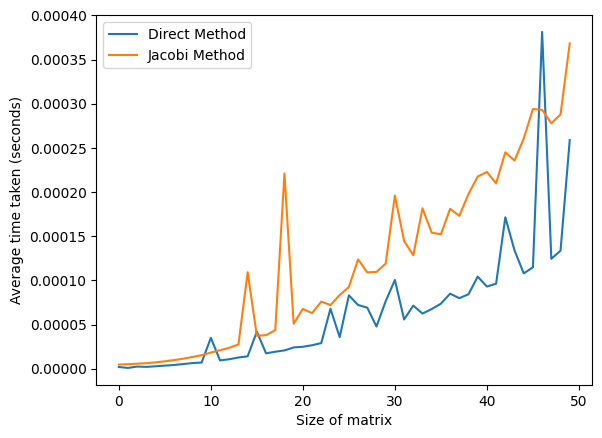

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time

# přímá metoda řešení soustavy rovnic - LU dekompozice
def direct_method(A, b):
    return np.linalg.solve(A, b)

# iterační metoda řešení soustavy rovnic - Jacobiho metoda
def jacobi(A, b, niteraci):
    x = np.zeros(len(A[0]))
    D = np.diag(A)
    R = A - np.diagflat(D)

    for i in range(niteraci):
        x = (b - np.dot(R,x)) / D    # inverzní matice diagonální je diagonální a má převrácené hodnoty
    return x

# počet iterací
n = 500
num_trials = 10

direct_times = []
jacobi_times = []

for i in range(2, n + 2, 10):
    # vygenerujeme náhodnou úlohu 
    A = np.random.randint(1, 10, size=(i, i))
    b = np.random.randint(1, 10, size= i)

    # přímá metoda
    avg_time = 0
    for j in range(num_trials):
        start = time.time()
        direct_method(A, b)
        end = time.time()
        avg_time = end-start
    direct_times.append(avg_time / num_trials)

    # Jacobiho metoda
    avg_time = 0
    for j in range(num_trials):
        start = time.time()
        jacobi(A, b, 10)
        end = time.time()
        avg_time = end-start
    jacobi_times.append(avg_time / num_trials)

print(direct_times)

plt.plot([i for i in range(n//10)], direct_times, label="Direct Method")
plt.plot([i for i in range(n//10)], jacobi_times, label="Jacobi Method")
plt.xlabel("Size of matrix")
plt.ylabel("Average time taken (seconds)")
plt.legend()
plt.show()


